#### PAIR PROGRAMMING - REGRESIÓN LOGÍSTICA - EDA

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

#Para desplegar todas las columnas de los dataframes
pd.options.display.max_columns = None

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Objetivos:
- Buscar un conjunto de datos a analizar
  Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado
- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
- Interpretación de los resultados.

In [3]:
df = pd.read_csv('datos/Invistico_Airline.csv', index_col = 0)

In [4]:
df.reset_index(inplace=True) #con este código así conseguimos pasar la columna satisfaction del índice a una columna normal

In [5]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


  - VR: satisfaction

In [6]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [7]:
#CAMBIAMOS NOMBRE A LA COLUMNAS PARA HOMOGENEIZAR

columnas_nuevas = {col:col.lower().replace(" ", "_") for col in df.columns}
df.rename(columns = columnas_nuevas, inplace=True)

In [8]:
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


In [9]:
def df_explore(dataframe):
    print(
        f"El dataframe tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")
    print("--------------")
    print(f"El dataframe tiene las siguientes columnas:")
    for col in dataframe.columns:
        print(col)
    print("--------------")
    print(f"Los principales estadísticos de las variables numéricas son:")
    display(dataframe.describe())
    print("--------------")
    print(f"Los principales estadísticos de las variables categóricas son:")
    display(dataframe.describe(include='object'))
    print("--------------")
    print("El porcentaje de nulos por columna:")
    for i, col in enumerate(dataframe.isnull().sum()):
        print(
            f"{dataframe.isnull().sum().index[i]}: {col/dataframe.shape[0]*100}")
    print("--------------")
    print(f"Hay {dataframe.duplicated().sum()} filas duplicadas.")
    print("--------------")
    print("A continuación el resultado del método .info():")
    dataframe.info()

In [10]:
df_explore(df)

El dataframe tiene 129880 filas y 23 columnas
--------------
El dataframe tiene las siguientes columnas:
satisfaction
gender
customer_type
age
type_of_travel
class
flight_distance
seat_comfort
departure/arrival_time_convenient
food_and_drink
gate_location
inflight_wifi_service
inflight_entertainment
online_support
ease_of_online_booking
on-board_service
leg_room_service
baggage_handling
checkin_service
cleanliness
online_boarding
departure_delay_in_minutes
arrival_delay_in_minutes
--------------
Los principales estadísticos de las variables numéricas son:


,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


--------------
Los principales estadísticos de las variables categóricas son:


,satisfaction,gender,customer_type,type_of_travel,class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


--------------
El porcentaje de nulos por columna:
satisfaction: 0.0
gender: 0.0
customer_type: 0.0
age: 0.0
type_of_travel: 0.0
class: 0.0
flight_distance: 0.0
seat_comfort: 0.0
departure/arrival_time_convenient: 0.0
food_and_drink: 0.0
gate_location: 0.0
inflight_wifi_service: 0.0
inflight_entertainment: 0.0
online_support: 0.0
ease_of_online_booking: 0.0
on-board_service: 0.0
leg_room_service: 0.0
baggage_handling: 0.0
checkin_service: 0.0
cleanliness: 0.0
online_boarding: 0.0
departure_delay_in_minutes: 0.0
arrival_delay_in_minutes: 0.3025870033877425
--------------
Hay 0 filas duplicadas.
--------------
A continuación el resultado del método .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   gender                   

In [11]:
#cambiar de object a category (?)
#ver si todos los integer son correctos
#ver qué hacer con la variable arrival_delay en minutos: 30% nulos

In [12]:
# columnas_categoria = ["satisfaction", "sex", "embarked", "maturity", "adult_male", "alone"]



In [13]:
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


In [14]:
df.duplicated().sum()

0

In [15]:
for col in df.columns:
   print(f"Los valores únicos de {col} son:")
   print(df[col].unique())
   print(".......")

Los valores únicos de satisfaction son:
['satisfied' 'dissatisfied']
.......
Los valores únicos de gender son:
['Female' 'Male']
.......
Los valores únicos de customer_type son:
['Loyal Customer' 'disloyal Customer']
.......
Los valores únicos de age son:
[65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]
.......
Los valores únicos de type_of_travel son:
['Personal Travel' 'Business travel']
.......
Los valores únicos de class son:
['Eco' 'Business' 'Eco Plus']
.......
Los valores únicos de flight_distance son:
[ 265 2464 2138 ... 5832 5120 4260]
.......
Los valores únicos de seat_comfort son:
[0 1 4 5 2 3]
.......
Los valores únicos de departure/arrival_time_convenient son:
[0 1 2 3 4 5]
.......
Los valores únicos de food_and_drink son:
[0 1 2 3 4 5]
.......
Los valores únicos de gate_location son:
[2 3 4 1 5

In [16]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [17]:
for col in df_num.columns:
   print(f"Los valores únicos de {col} son:")
   print(df[col].unique())
   print(".......")

Los valores únicos de age son:
[65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]
.......
Los valores únicos de flight_distance son:
[ 265 2464 2138 ... 5832 5120 4260]
.......
Los valores únicos de seat_comfort son:
[0 1 4 5 2 3]
.......
Los valores únicos de departure/arrival_time_convenient son:
[0 1 2 3 4 5]
.......
Los valores únicos de food_and_drink son:
[0 1 2 3 4 5]
.......
Los valores únicos de gate_location son:
[2 3 4 1 5 0]
.......
Los valores únicos de inflight_wifi_service son:
[2 0 3 4 5 1]
.......
Los valores únicos de inflight_entertainment son:
[4 2 0 3 5 1]
.......
Los valores únicos de online_support son:
[2 3 4 5 1 0]
.......
Los valores únicos de ease_of_online_booking son:
[3 2 1 5 4 0]
.......
Los valores únicos de on-board_service son:
[3 4 1 2 5 0]
.......
Los valores únicos de leg_r

In [18]:
for col in df_num.columns:
   print(f"El conteo de cada uno de los valores únicos de {col} es:")
   print(df_num[col].value_counts())
   print(".......")

El conteo de cada uno de los valores únicos de age es:
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: age, Length: 75, dtype: int64
.......
El conteo de cada uno de los valores únicos de flight_distance es:
1963    92
1812    88
1639    87
1981    86
1789    86
        ..
4222     1
5049     1
5378     1
5613     1
4260     1
Name: flight_distance, Length: 5398, dtype: int64
.......
El conteo de cada uno de los valores únicos de seat_comfort es:
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: seat_comfort, dtype: int64
.......
El conteo de cada uno de los valores únicos de departure/arrival_time_convenient es:
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: departure/arrival_time_convenient, dtype: int64
.......
El conteo de cada uno de los valores únicos de food_and_drink es:
3    28150
4    27216
2    27146
1    21076
5    20347
0     5945
Name: food_and_dri

In [19]:
#numéricas reales= arrival_delay, departure_delay, age, flight_distance

In [20]:
df_num.head(3)

,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0


In [21]:
def similar_variables(lista_variables,plot = True):
    for columna in lista_variables:
        print(' Los valores únicos para la variable',columna, 'son:', list( df_num[columna].unique()))
        value_counts = df_num[columna].value_counts()
        if plot == True:
            plt.figure()
            value_counts.plot.pie(figsize=(8,8))
        else:
            pass

In [22]:
lista_col = ['online_support', 'online_boarding']

 Los valores únicos para la variable online_support son: [2, 3, 4, 5, 1, 0]
 Los valores únicos para la variable online_boarding son: [2, 3, 5, 4, 1, 0]


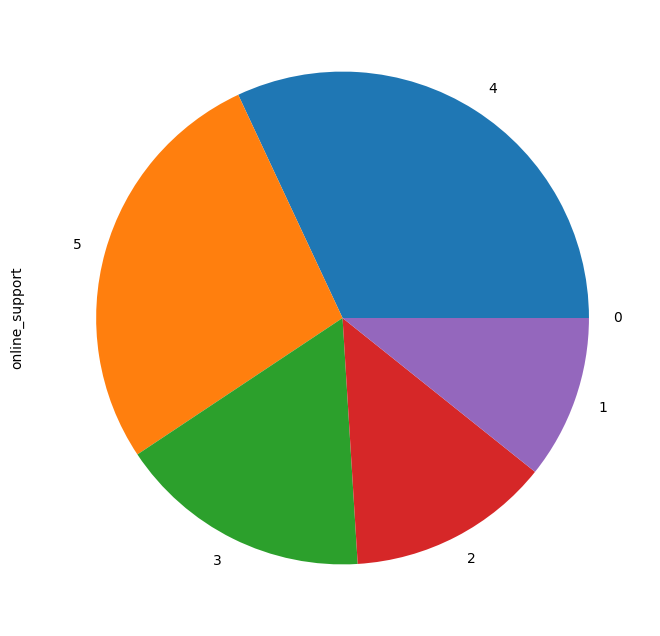

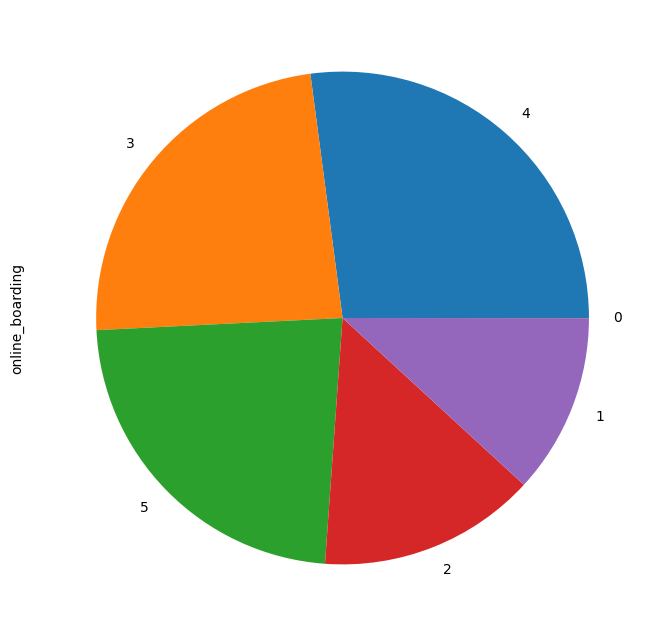

In [23]:
#Intentamos ver si las variables online_support y online_boarding son similares o contienen la misma información. NO obstante, después de obtener los gráficos, vemos que no se trata de la misma información
similar_variables(lista_col) 

In [24]:
df_cat= df.select_dtypes(include = 'object')
df_cat.head()

,satisfaction,gender,customer_type,type_of_travel,class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco


In [25]:
for i in df_cat.columns:
    df_cat[i] = df_cat[i].astype("category")

In [26]:
df_cat.dtypes

satisfaction      category
gender            category
customer_type     category
type_of_travel    category
class             category
dtype: object

- ANÁLISIS EXPLOTARIO CON GRÁFICAS

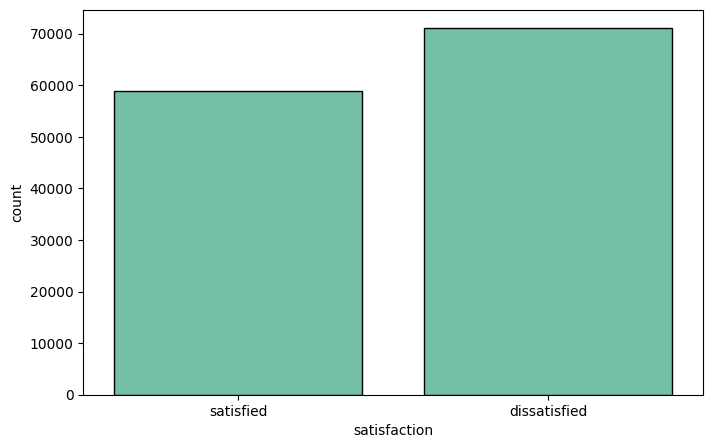

In [27]:
plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df_cat, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["satisfied", "dissatisfied"]) 
plt.show();

In [28]:
df_cat["satisfaction"].value_counts() / df_cat.shape[0] *100

satisfied       54.73283
dissatisfied    45.26717
Name: satisfaction, dtype: float64

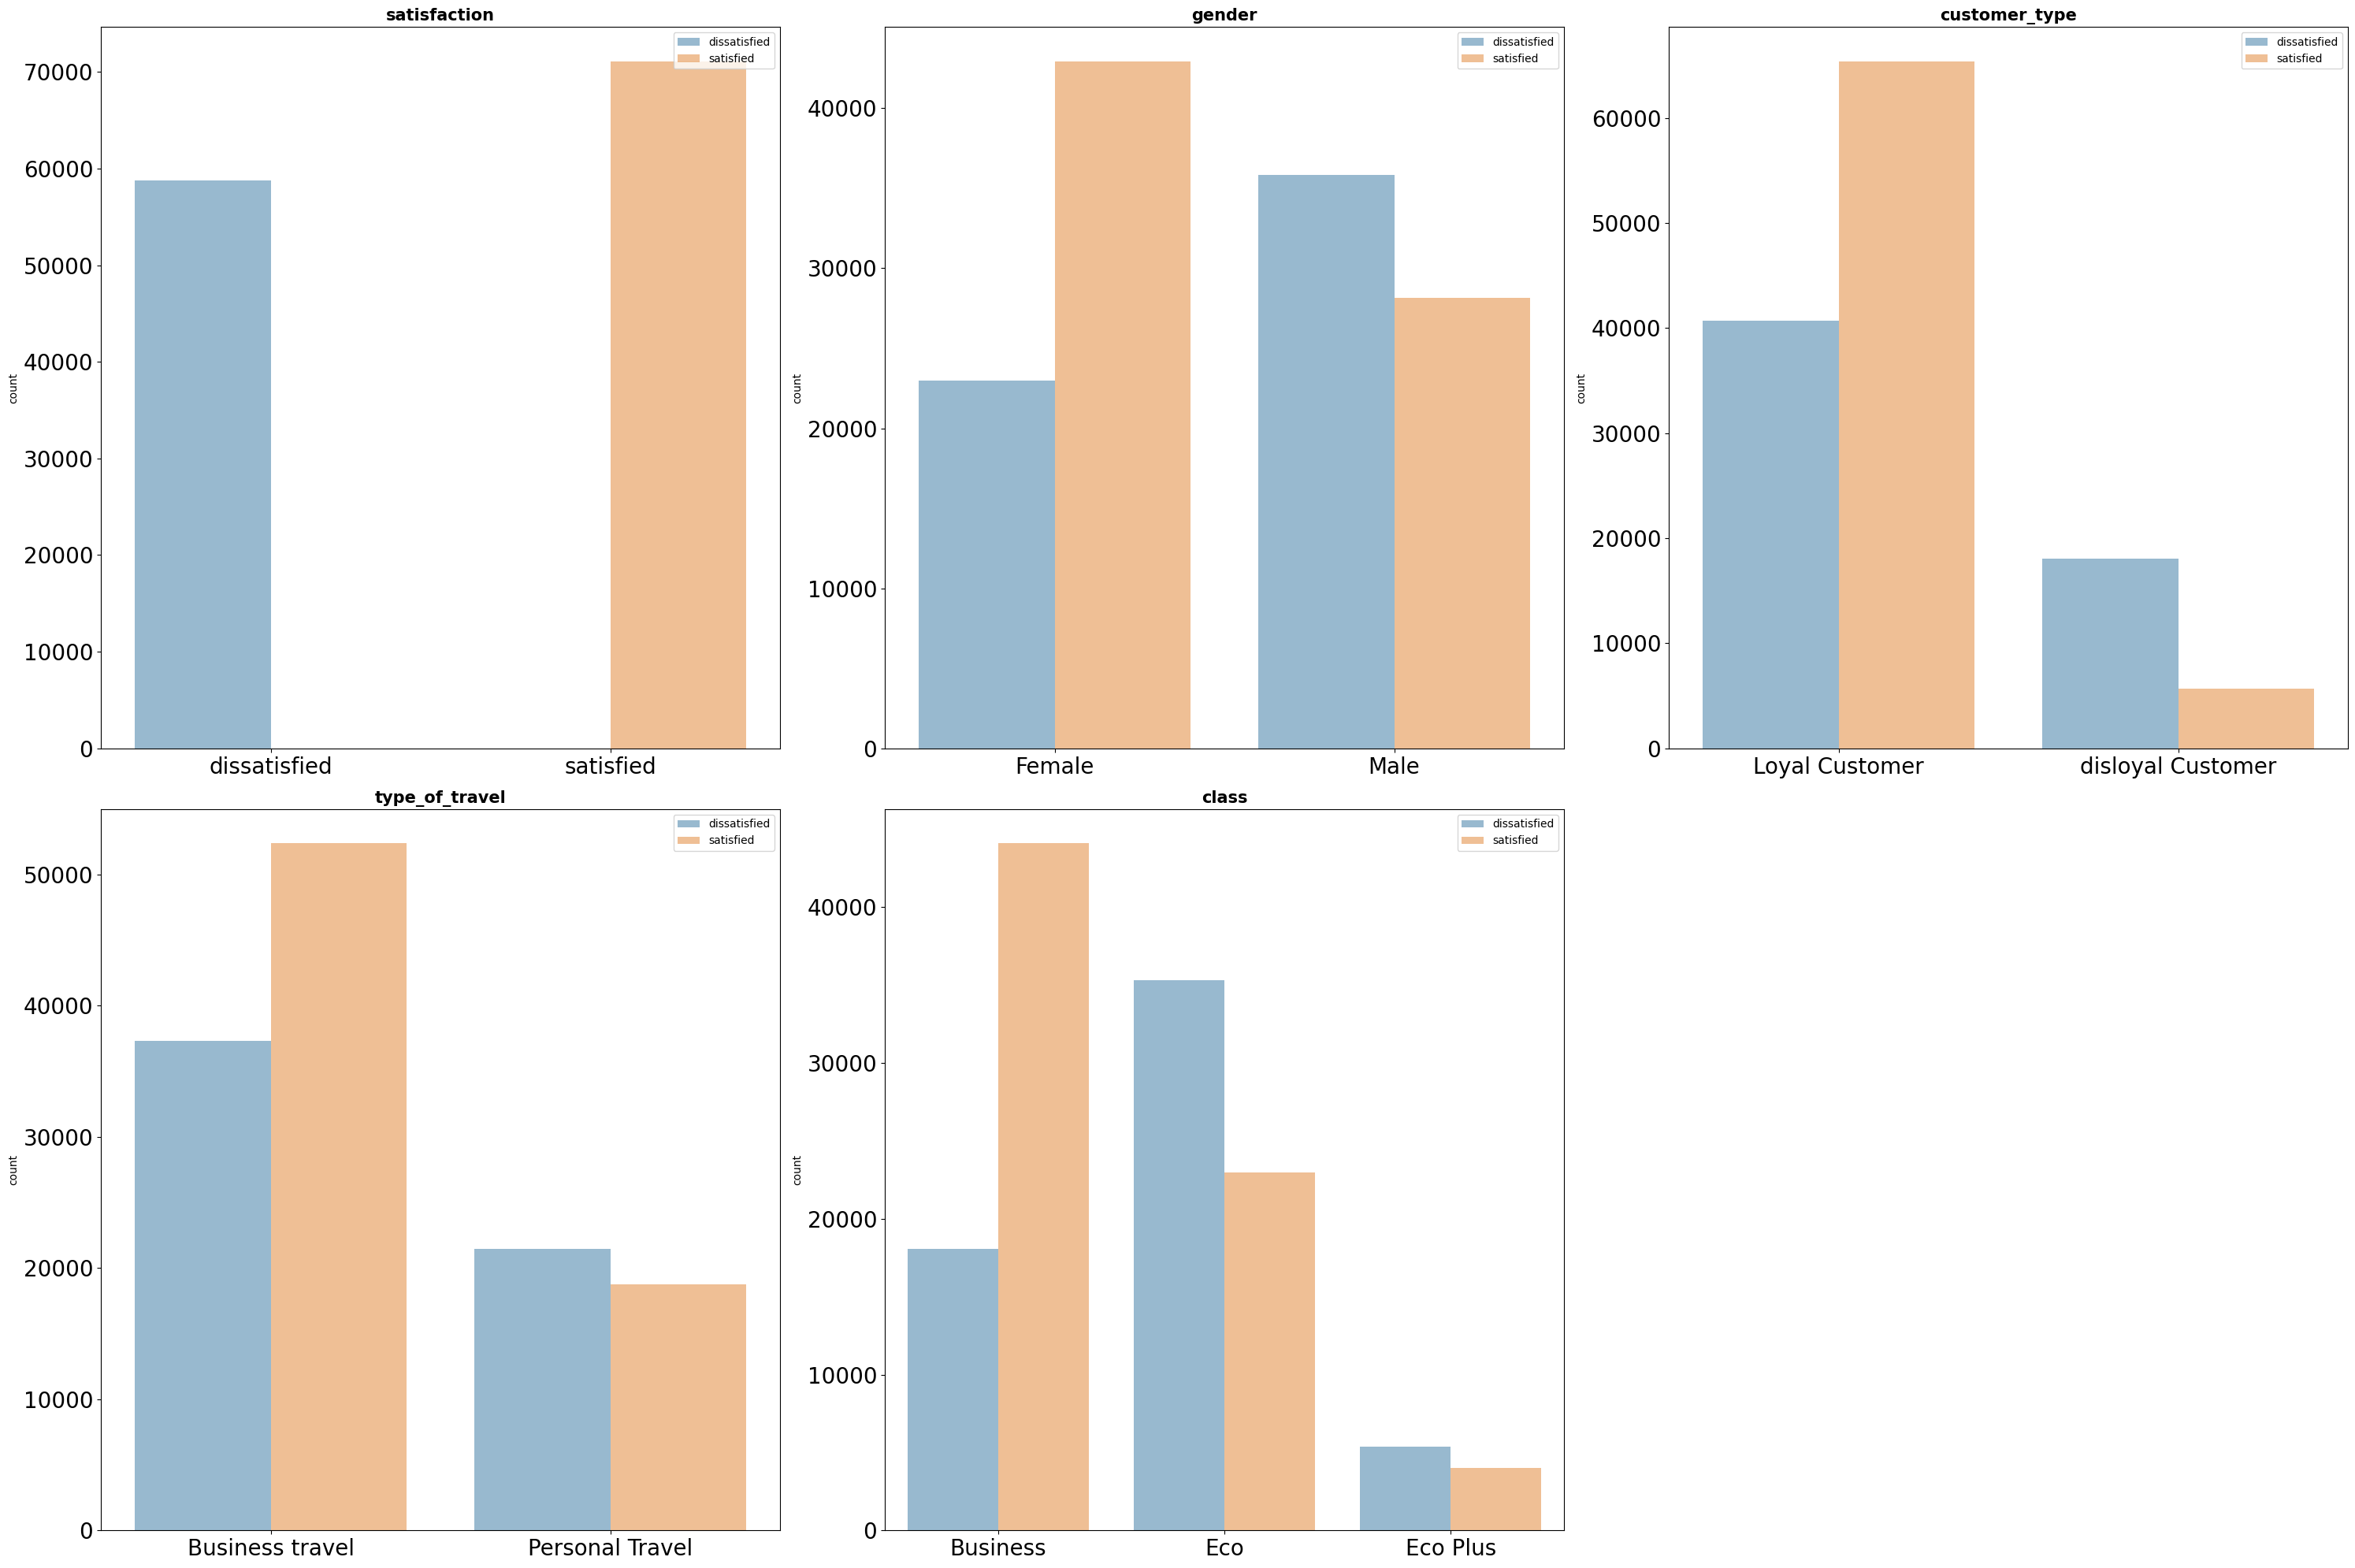

In [29]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 20))

axes = axes.flat

for i, colum in enumerate(df_cat): 
    sns.countplot(
        data = df_cat,
        x = colum,
        hue = "satisfaction",
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")
    
fig.delaxes(axes[-1])
fig.tight_layout();

In [30]:
df_num.head(2)

,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0


In [35]:
numericas_reales=  df_num.filter(items = ["age", "flight_distance", "arrival_delay_in_minutes", "departure_delay_in_minutes"])

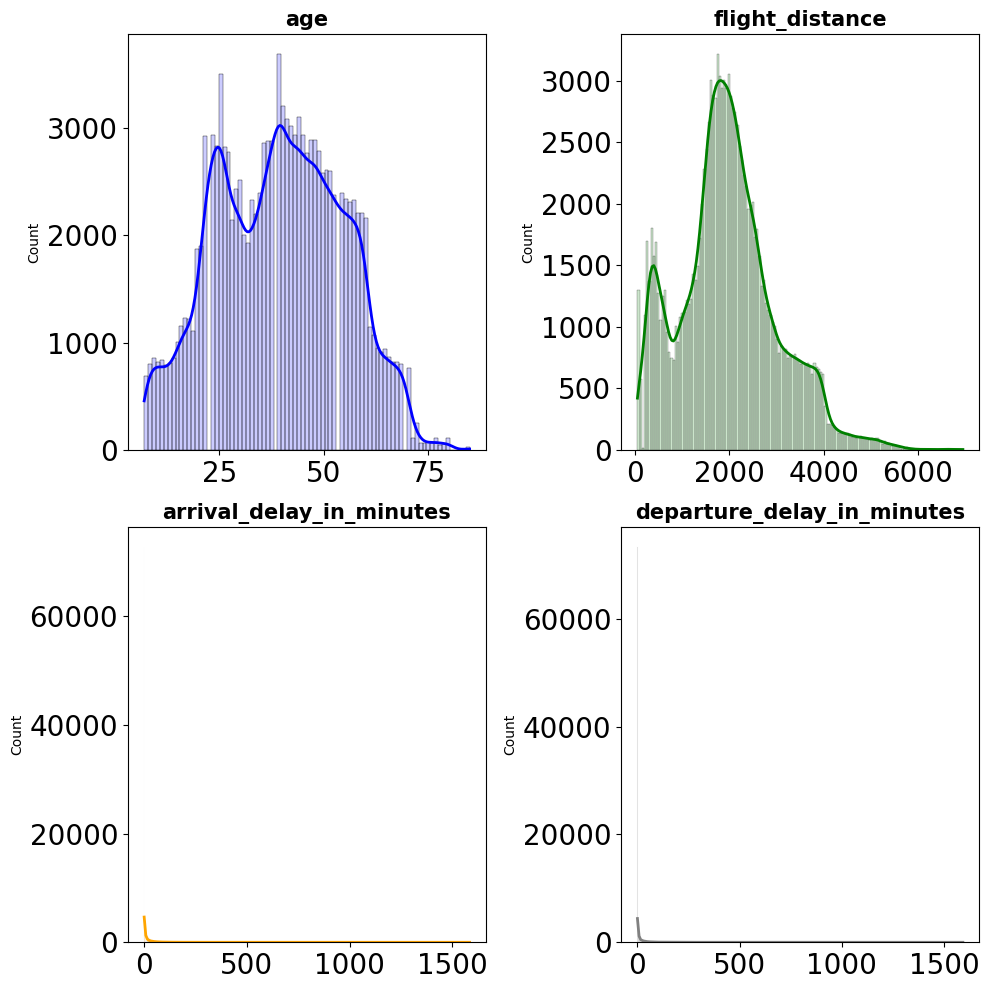

In [36]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

lista_colores = ["blue", "green", "orange", "grey"]

axes = axes.flat

for i, colum in enumerate(numericas_reales): 
    sns.histplot(
        data = numericas_reales,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

  
fig.tight_layout();

In [49]:
df_num.head()

,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [52]:
df_num['arrival_delay_in_minutes'].unique()

array([0.000e+00, 3.050e+02, 1.500e+01, 2.600e+01, 4.800e+01, 2.300e+01,
       1.900e+01, 2.000e+00, 4.400e+02, 5.000e+00, 1.000e+00, 7.000e+00,
       8.000e+00, 4.500e+01, 6.900e+01, 1.300e+01, 3.000e+00, 1.200e+01,
       1.000e+01, 6.000e+00, 8.000e+01,       nan, 4.000e+00, 8.600e+01,
       5.700e+01, 1.400e+01, 9.000e+00, 9.600e+01, 2.140e+02, 5.000e+01,
       2.400e+01, 1.370e+02, 1.800e+01, 2.700e+01, 1.600e+01, 1.210e+02,
       7.500e+01, 1.700e+01, 3.700e+01, 5.300e+01, 5.900e+01, 7.600e+01,
       4.400e+01, 1.310e+02, 3.600e+01, 3.300e+01, 2.220e+02, 3.200e+01,
       2.900e+01, 2.800e+01, 6.100e+01, 3.500e+01, 4.100e+01, 6.300e+01,
       1.750e+02, 3.800e+01, 1.420e+02, 9.000e+01, 1.630e+02, 8.400e+01,
       7.200e+01, 7.400e+01, 1.100e+01, 1.180e+02, 5.600e+01, 1.190e+02,
       5.200e+01, 2.500e+01, 2.360e+02, 1.120e+02, 6.500e+01, 9.300e+01,
       3.020e+02, 3.400e+01, 2.000e+01, 1.240e+02, 1.950e+02, 1.360e+02,
       9.700e+01, 1.790e+02, 1.060e+02, 7.800e+01, 

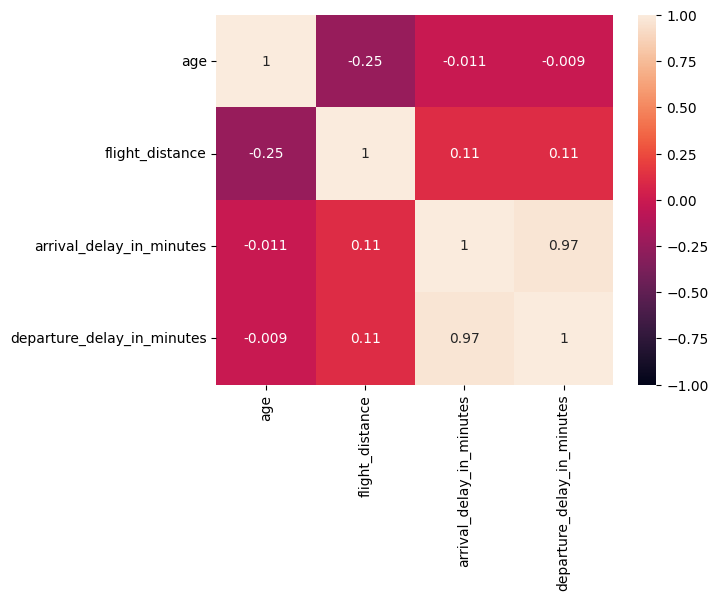

In [39]:
sns.heatmap(numericas_reales.corr(),
            annot = True,
            vmin = -1,
            vmax= 1);

In [42]:
correlacion = df_num.corr()

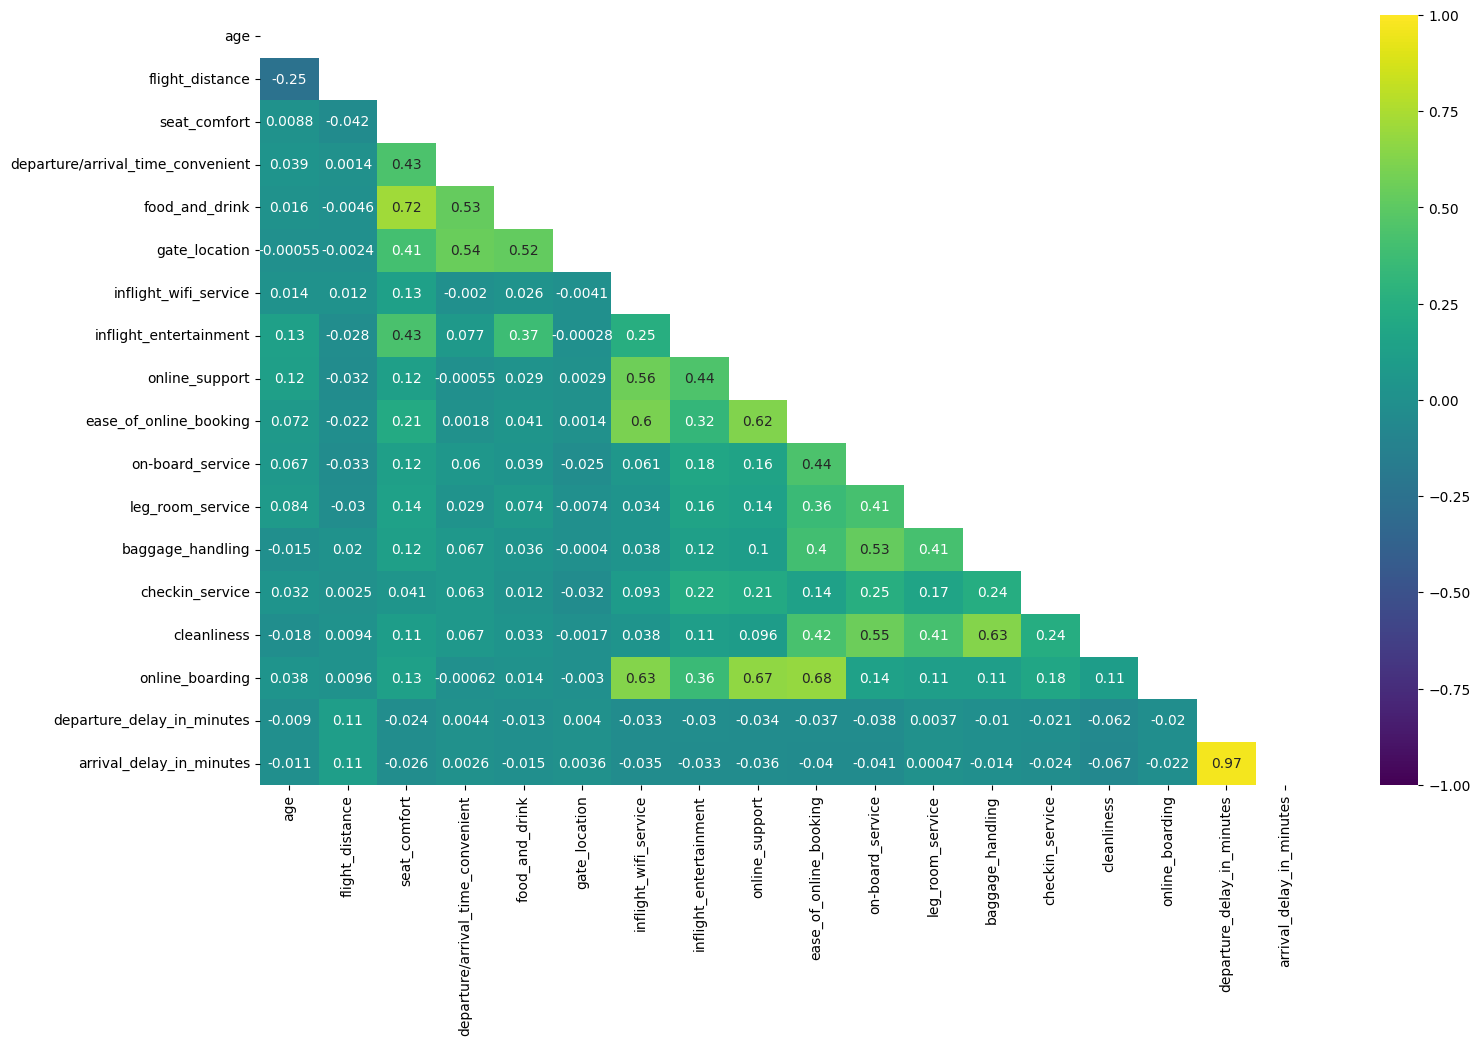

In [45]:
plt.figure(figsize=(17,10))
mask = np.triu(np.ones_like( correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask, vmin = -1, vmax = 1); #barra lateral

In [53]:
#viendo la alta correlación de las dos variables que hay en minutos, decidimos eliminar una de ellas: arrival_delay_in_minutes
df.drop('arrival_delay_in_minutes', axis = 1, inplace = True)